In [2]:
!pip install mlxtend


Defaulting to user installation because normal site-packages is not writeable


In [4]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules


In [9]:
# Load the dataset
data = pd.read_excel(r"D:/Excelr Assignments/10 Association Rules/Association Rules/Online retail.xlsx", header=None)
data.head()


,0
0,"shrimp,almonds,avocado,vegetables mix,green gr..."
1,"burgers,meatballs,eggs"
2,chutney
3,"turkey,avocado"
4,"mineral water,milk,energy bar,whole wheat rice..."


In [10]:
# Convert each transaction string into a list of items
transactions = data[0].apply(lambda x: x.split(','))

# One-hot encode the transactions
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)

# Convert the boolean array (True/False) to integers (1/0)
basket = pd.DataFrame(te_ary, columns=te.columns_).astype(int)

# Display the first few rows of the binary encoded DataFrame
basket.head()


,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,0,1,1,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [11]:
basket.shape

(7501, 120)

In [12]:
frequent_itemsets_ap = apriori(basket, min_support = 0.003)
print(len(frequent_itemsets_ap))

C:\Users\aravi\AppData\Roaming\Python\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


1443


In [14]:
frequent_itemsets_ap = apriori(basket, min_support=0.003, use_colnames= True, verbose=1)
print(frequent_itemsets_ap.head())

C:\Users\aravi\AppData\Roaming\Python\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Processing 435 combinations | Sampling itemset size 5 4
    support             itemsets
0  0.020397            (almonds)
1  0.008932  (antioxydant juice)
2  0.004666          (asparagus)
3  0.033329            (avocado)
4  0.004533        (babies food)


In [15]:
frequent_itemsets_ap.sort_values("support", ascending = False).head()

,support,itemsets
69,0.238368,(mineral water)
34,0.179709,(eggs)
96,0.174110,(spaghetti)
40,0.170911,(french fries)
23,0.163845,(chocolate)


In [16]:
rules_ap = association_rules(frequent_itemsets_ap, metric= "confidence", min_threshold=0.05)
print(rules_ap.head())

  antecedents  consequents  antecedent support  consequent support   support  \
0   (almonds)    (burgers)            0.020397            0.087188  0.005199   
1   (burgers)    (almonds)            0.087188            0.020397  0.005199   
2   (almonds)       (cake)            0.020397            0.081056  0.003066   
3   (almonds)  (chocolate)            0.020397            0.163845  0.005999   
4   (almonds)       (eggs)            0.020397            0.179709  0.006532   

   confidence      lift  leverage  conviction  zhangs_metric  
0    0.254902  2.923577  0.003421    1.225089       0.671653  
1    0.059633  2.923577  0.003421    1.041724       0.720799  
2    0.150327  1.854607  0.001413    1.081527       0.470397  
3    0.294118  1.795099  0.002657    1.184553       0.452150  
4    0.320261  1.782108  0.002867    1.206774       0.448005  


In [17]:
rules_ap[(rules_ap.support > 0.015) & (rules_ap.confidence > 0.4)].sort_values("confidence", ascending = False).shape

(8, 10)

In [18]:
rules_ap['lhs items'] = rules_ap['antecedents'].apply(lambda x:len(x) )
rules_ap[rules_ap['lhs items']>1].sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,lhs items
3512,"(milk, mineral water)","(soup, frozen vegetables)",0.047994,0.007999,0.003066,0.063889,7.987176,0.002682,1.059704,0.918901,2
3513,"(soup, frozen vegetables)","(milk, mineral water)",0.007999,0.047994,0.003066,0.383333,7.987176,0.002682,1.543794,0.881853,2
3499,"(olive oil, frozen vegetables)","(milk, mineral water)",0.011332,0.047994,0.003333,0.294118,6.128268,0.002789,1.348676,0.846413,2
3504,"(milk, mineral water)","(olive oil, frozen vegetables)",0.047994,0.011332,0.003333,0.069444,6.128268,0.002789,1.062449,0.879009,2
3132,"(whole wheat pasta, mineral water)",(olive oil),0.009599,0.065858,0.003866,0.402778,6.115863,0.003234,1.564145,0.844598,2


(array([ 0.5,  4.5,  8.5, 12.5, 16.5, 20.5, 24.5, 28.5, 32.5, 36.5, 40.5,
        44.5, 48.5, 52.5, 56.5, 60.5, 64.5, 68.5, 72.5, 76.5, 80.5, 84.5,
        88.5]),
 [Text(0.5, 0, 'avocado'),
  Text(4.5, 0, 'cereals'),
  Text(8.5, 0, 'chocolate,ground beef'),
  Text(12.5, 0, 'chocolate,spaghetti'),
  Text(16.5, 0, 'eggs'),
  Text(20.5, 0, 'eggs,ground beef'),
  Text(24.5, 0, 'french fries'),
  Text(28.5, 0, 'fresh bread'),
  Text(32.5, 0, 'frozen vegetables'),
  Text(36.5, 0, 'frozen vegetables,tomatoes'),
  Text(40.5, 0, 'ground beef,mineral water'),
  Text(44.5, 0, 'herb & pepper'),
  Text(48.5, 0, 'low fat yogurt'),
  Text(52.5, 0, 'milk,frozen smoothie'),
  Text(56.5, 0, 'milk,shrimp'),
  Text(60.5, 0, 'mineral water'),
  Text(64.5, 0, 'olive oil,frozen vegetables'),
  Text(68.5, 0, 'olive oil,spaghetti'),
  Text(72.5, 0, 'red wine'),
  Text(76.5, 0, 'soup'),
  Text(80.5, 0, 'spaghetti,frozen vegetables'),
  Text(84.5, 0, 'spaghetti,shrimp'),
  Text(88.5, 0, 'turkey')])

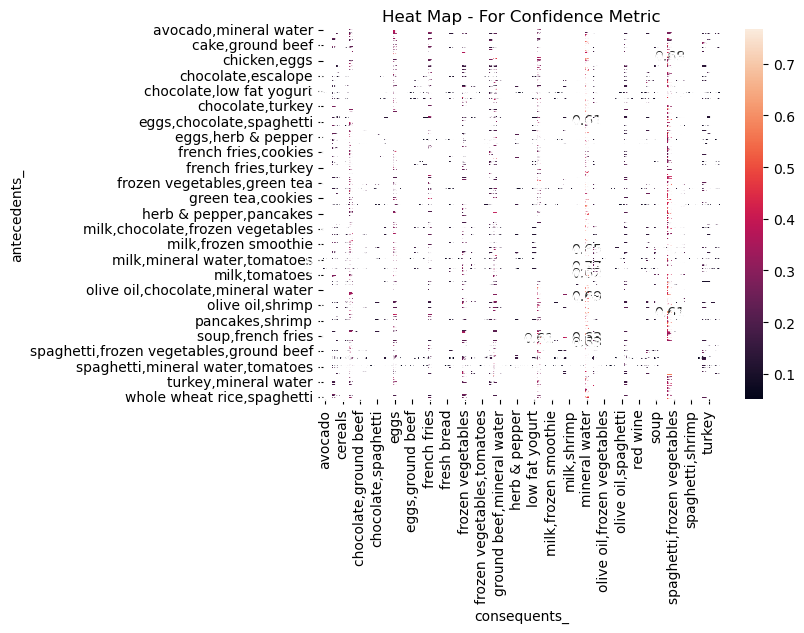

In [19]:
rules_ap['antecedents_'] = rules_ap['antecedents'].apply(lambda a: ','.join(list(a)))
rules_ap['consequents_'] = rules_ap['consequents'].apply(lambda a: ','.join(list(a)))
# Transform the DataFrame of rules into a matrix using the confidence metric
pivot = rules_ap[rules_ap['lhs items']>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'confidence')
# Generate a heatmap with annotations 
sns.heatmap(pivot, annot = True)
plt.title('Heat Map - For Confidence Metric')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

In [20]:
rules_ap_li = association_rules(frequent_itemsets_ap, metric="lift", min_threshold=0.6)
print(rules_ap_li.shape)

(5118, 10)


In [21]:
rules_ap_li['lhs items'] = rules_ap_li['antecedents'].apply(lambda x:len(x) )
rules_ap_li[rules_ap_li['lhs items']>1].sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,lhs items
4970,"(milk, mineral water)","(soup, frozen vegetables)",0.047994,0.007999,0.003066,0.063889,7.987176,0.002682,1.059704,0.918901,2
4971,"(soup, frozen vegetables)","(milk, mineral water)",0.007999,0.047994,0.003066,0.383333,7.987176,0.002682,1.543794,0.881853,2
4954,"(olive oil, frozen vegetables)","(milk, mineral water)",0.011332,0.047994,0.003333,0.294118,6.128268,0.002789,1.348676,0.846413,2
4959,"(milk, mineral water)","(olive oil, frozen vegetables)",0.047994,0.011332,0.003333,0.069444,6.128268,0.002789,1.062449,0.879009,2
4444,"(whole wheat pasta, mineral water)",(olive oil),0.009599,0.065858,0.003866,0.402778,6.115863,0.003234,1.564145,0.844598,2


(array([ 0.5,  4.5,  8.5, 12.5, 16.5, 20.5, 24.5, 28.5, 32.5, 36.5, 40.5,
        44.5, 48.5, 52.5, 56.5, 60.5, 64.5, 68.5, 72.5, 76.5, 80.5, 84.5,
        88.5]),
 [Text(0.5, 0, 'avocado'),
  Text(4.5, 0, 'cereals'),
  Text(8.5, 0, 'chocolate,ground beef'),
  Text(12.5, 0, 'chocolate,spaghetti'),
  Text(16.5, 0, 'eggs'),
  Text(20.5, 0, 'eggs,ground beef'),
  Text(24.5, 0, 'french fries'),
  Text(28.5, 0, 'fresh bread'),
  Text(32.5, 0, 'frozen vegetables'),
  Text(36.5, 0, 'frozen vegetables,tomatoes'),
  Text(40.5, 0, 'ground beef,mineral water'),
  Text(44.5, 0, 'herb & pepper'),
  Text(48.5, 0, 'low fat yogurt'),
  Text(52.5, 0, 'milk,frozen smoothie'),
  Text(56.5, 0, 'milk,shrimp'),
  Text(60.5, 0, 'mineral water'),
  Text(64.5, 0, 'olive oil,frozen vegetables'),
  Text(68.5, 0, 'olive oil,spaghetti'),
  Text(72.5, 0, 'red wine'),
  Text(76.5, 0, 'soup'),
  Text(80.5, 0, 'spaghetti,frozen vegetables'),
  Text(84.5, 0, 'spaghetti,shrimp'),
  Text(88.5, 0, 'turkey')])

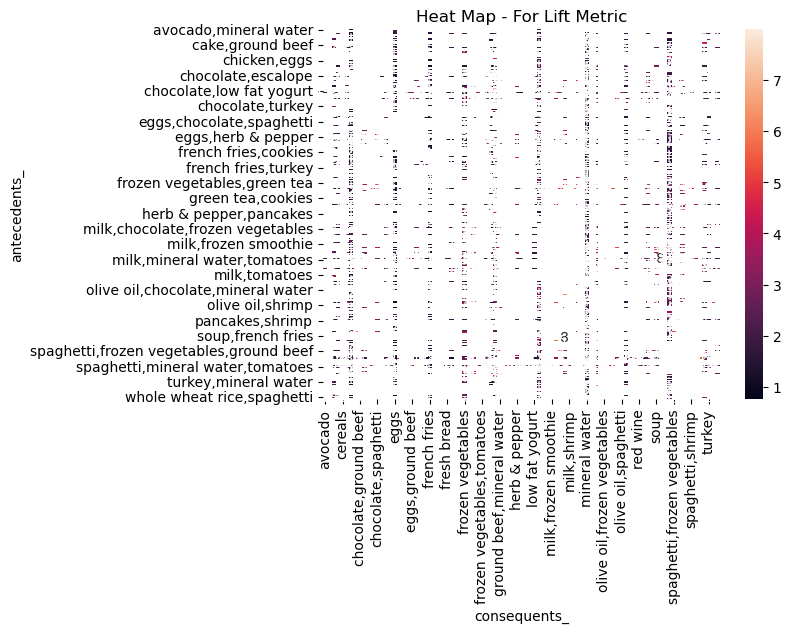

In [22]:
# Replace frozen sets with strings
rules_ap_li['antecedents_'] = rules_ap_li['antecedents'].apply(lambda a: ','.join(list(a)))
rules_ap_li['consequents_'] = rules_ap_li['consequents'].apply(lambda a: ','.join(list(a)))
# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules_ap_li[rules_ap_li['lhs items']>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'lift')
# Generate a heatmap with annotations on and the colorbar off
sns.heatmap(pivot, annot = True)
plt.title('Heat Map - For Lift Metric')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

In [23]:
frequent_itemsets_fp=fpgrowth(basket, min_support=0.002, use_colnames=True,verbose=1)
print(frequent_itemsets_fp.shape)

C:\Users\aravi\AppData\Roaming\Python\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


115 itemset(s) from tree conditioned on items ()
0 itemset(s) from tree conditioned on items (mineral water)
5 itemset(s) from tree conditioned on items (green tea)
0 itemset(s) from tree conditioned on items (green tea, mineral water)
2 itemset(s) from tree conditioned on items (green tea, spaghetti)
0 itemset(s) from tree conditioned on items (green tea, spaghetti, mineral water)
0 itemset(s) from tree conditioned on items (green tea, spaghetti, french fries)
1 itemset(s) from tree conditioned on items (green tea, french fries)
4 itemset(s) from tree conditioned on items (green tea, chocolate)
0 itemset(s) from tree conditioned on items (green tea, chocolate, spaghetti)
0 itemset(s) from tree conditioned on items (green tea, chocolate, mineral water)
0 itemset(s) from tree conditioned on items (green tea, chocolate, eggs)
0 itemset(s) from tree conditioned on items (green tea, chocolate, french fries)
3 itemset(s) from tree conditioned on items (green tea, eggs)
0 itemset(s) from tre

In [24]:
frequent_itemsets_fp.sort_values("support", ascending = False).head()


,support,itemsets
0,0.238368,(mineral water)
20,0.179709,(eggs)
33,0.174110,(spaghetti)
28,0.170911,(french fries)
39,0.163845,(chocolate)


In [25]:
rules_fp = association_rules(frequent_itemsets_fp, metric="confidence", min_threshold=0.05)
print(rules_fp.shape)


(6727, 10)


In [26]:
rules_fp[(rules_fp.support > 0.05) & (rules_fp.confidence > 0.2)].sort_values("confidence", ascending = False).head()


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
3152,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314,0.369437
3859,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357,0.308965
1779,(eggs),(mineral water),0.179709,0.238368,0.050927,0.283383,1.188845,0.008090,1.062815,0.193648
3153,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008,0.400606
3860,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256,0.339197


In [27]:
rules_fp['lhs items'] = rules_fp['antecedents'].apply(lambda x:len(x) )
rules_fp[rules_fp['lhs items']>1].sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,lhs items
4726,"(escalope, mushroom cream sauce)",(pasta),0.005733,0.015731,0.002533,0.441860,28.088096,0.002443,1.763482,0.969958,2
4724,"(pasta, escalope)",(mushroom cream sauce),0.005866,0.019064,0.002533,0.431818,22.650826,0.002421,1.726447,0.961491,2
4725,"(pasta, mushroom cream sauce)",(escalope),0.002666,0.079323,0.002533,0.950000,11.976387,0.002321,18.413545,0.918953,2
810,"(olive oil, tomatoes)","(spaghetti, frozen vegetables)",0.007199,0.027863,0.002133,0.296296,10.634060,0.001932,1.381458,0.912532,2
811,"(spaghetti, frozen vegetables)","(olive oil, tomatoes)",0.027863,0.007199,0.002133,0.076555,10.634060,0.001932,1.075106,0.931929,2


(array([  0.5,   6.5,  12.5,  18.5,  24.5,  30.5,  36.5,  42.5,  48.5,
         54.5,  60.5,  66.5,  72.5,  78.5,  84.5,  90.5,  96.5, 102.5,
        108.5, 114.5, 120.5, 126.5, 132.5, 138.5]),
 [Text(0.5, 0, 'almonds'),
  Text(6.5, 0, 'butter'),
  Text(12.5, 0, 'champagne'),
  Text(18.5, 0, 'chocolate,burgers'),
  Text(24.5, 0, 'chocolate,mineral water'),
  Text(30.5, 0, 'cooking oil,mineral water'),
  Text(36.5, 0, 'eggs,french fries'),
  Text(42.5, 0, 'eggs,spaghetti'),
  Text(48.5, 0, 'french fries,mineral water'),
  Text(54.5, 0, 'frozen smoothie'),
  Text(60.5, 0, 'frozen vegetables,shrimp'),
  Text(66.5, 0, 'ground beef,mineral water'),
  Text(72.5, 0, 'herb & pepper,mineral water'),
  Text(78.5, 0, 'milk'),
  Text(84.5, 0, 'milk,frozen vegetables'),
  Text(90.5, 0, 'milk,tomatoes'),
  Text(96.5, 0, 'oil'),
  Text(102.5, 0, 'olive oil,milk'),
  Text(108.5, 0, 'parmesan cheese'),
  Text(114.5, 0, 'salmon'),
  Text(120.5, 0, 'soup,frozen vegetables'),
  Text(126.5, 0, 'spaghetti,g

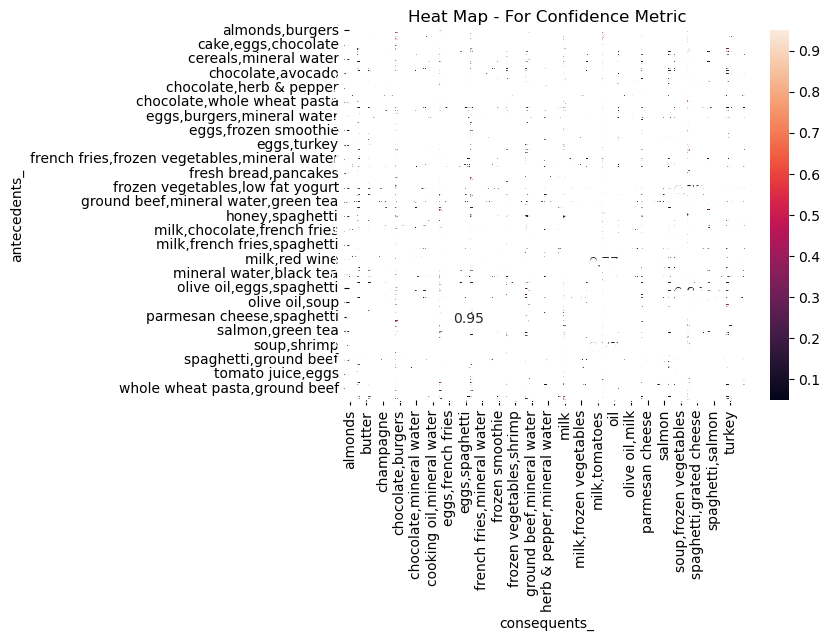

In [28]:
rules_fp['antecedents_'] = rules_fp['antecedents'].apply(lambda a: ','.join(list(a)))
rules_fp['consequents_'] = rules_fp['consequents'].apply(lambda a: ','.join(list(a)))
# Transform the DataFrame of rules into a matrix using the confidence metric
pivot = rules_fp[rules_fp['lhs items']>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'confidence')
# Generate a heatmap with annotations 
sns.heatmap(pivot, annot = True)
plt.title('Heat Map - For Confidence Metric')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

In [29]:

rules_fp_li = association_rules(frequent_itemsets_fp, metric="lift", min_threshold=0.6)
print(rules_fp_li.shape)

(10438, 10)


In [30]:
rules_fp_li['lhs items'] = rules_fp_li['antecedents'].apply(lambda x:len(x) )
rules_fp_li[rules_fp_li['lhs items']>1].sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,lhs items
7260,"(escalope, mushroom cream sauce)",(pasta),0.005733,0.015731,0.002533,0.441860,28.088096,0.002443,1.763482,0.969958,2
7258,"(pasta, escalope)",(mushroom cream sauce),0.005866,0.019064,0.002533,0.431818,22.650826,0.002421,1.726447,0.961491,2
7259,"(pasta, mushroom cream sauce)",(escalope),0.002666,0.079323,0.002533,0.950000,11.976387,0.002321,18.413545,0.918953,2
1222,"(olive oil, tomatoes)","(spaghetti, frozen vegetables)",0.007199,0.027863,0.002133,0.296296,10.634060,0.001932,1.381458,0.912532,2
1223,"(spaghetti, frozen vegetables)","(olive oil, tomatoes)",0.027863,0.007199,0.002133,0.076555,10.634060,0.001932,1.075106,0.931929,2


(array([  0.5,   7.5,  14.5,  21.5,  28.5,  35.5,  42.5,  49.5,  56.5,
         63.5,  70.5,  77.5,  84.5,  91.5,  98.5, 105.5, 112.5, 119.5,
        126.5, 133.5, 140.5, 147.5, 154.5, 161.5, 168.5, 175.5]),
 [Text(0.5, 0, 'almonds'),
  Text(7.5, 0, 'butter'),
  Text(14.5, 0, 'cake,spaghetti'),
  Text(21.5, 0, 'chocolate'),
  Text(28.5, 0, 'chocolate,herb & pepper'),
  Text(35.5, 0, 'cooking oil'),
  Text(42.5, 0, 'eggs,burgers'),
  Text(49.5, 0, 'eggs,ground beef'),
  Text(56.5, 0, 'escalope'),
  Text(63.5, 0, 'french fries,mineral water'),
  Text(70.5, 0, 'frozen smoothie,mineral water'),
  Text(77.5, 0, 'frozen vegetables,tomatoes'),
  Text(84.5, 0, 'ground beef,green tea'),
  Text(91.5, 0, 'herb & pepper,ground beef'),
  Text(98.5, 0, 'meatballs'),
  Text(105.5, 0, 'milk,french fries'),
  Text(112.5, 0, 'milk,shrimp'),
  Text(119.5, 0, 'mineral water,tomatoes'),
  Text(126.5, 0, 'olive oil,frozen vegetables'),
  Text(133.5, 0, 'olive oil,soup'),
  Text(140.5, 0, 'pasta'),
  Text(14

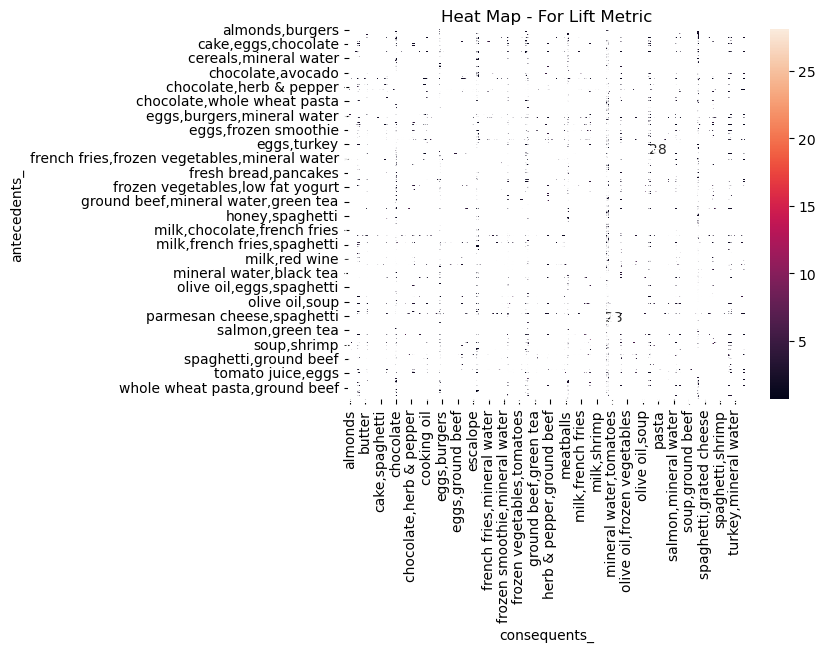

In [31]:
# Replace frozen sets with strings
rules_fp_li['antecedents_'] = rules_fp_li['antecedents'].apply(lambda a: ','.join(list(a)))
rules_fp_li['consequents_'] = rules_fp_li['consequents'].apply(lambda a: ','.join(list(a)))
# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules_fp_li[rules_fp_li['lhs items']>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'lift')
# Generate a heatmap with annotations on and the colorbar off
sns.heatmap(pivot, annot = True)
plt.title('Heat Map - For Lift Metric')
plt.yticks(rotation=0)
plt.xticks(rotation=90)
